# Computing Square Adapted Wasserstein Distance 2 with Fitted Value Iteration

This notebook demonstrates how to compute the squared adapted Wasserstein distance using Fitted Value Iteration (FVI). The method leverages conditional density estimation, as described in the paper:

**"Learning conditional distributions on continuous spaces"**  
Cyril Bénézet, Ziteng Cheng, and Sebastian Jaimungal (2024).  
[arXiv:2406.09375](https://arxiv.org/abs/2406.09375)

We utilize a neural network-based approach to estimate conditional densities and train a deep Q-network (DQN) to approximate the adapted optimal transport distance. The codebase integrates various modules for sampling paths, building adapted trees, and solving the transport problem efficiently.

In this notebook, we will:
1. Generate sample paths from Brownian motion.
2. Estimate conditional densities.
3. Train the FVI algorithm to approximate the adapted Wasserstein distance.
4. Compute and compare the real adapted Wasserstein distance as a benchmarking value.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import time
import matplotlib.pyplot as plt
import sys
import os

# Define paths to relevant modules
measure_sampling_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/Measure_sampling')
CD_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/Conditional_density')
FVI_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/FVI')
Benchmark_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/Benchmark_value_Gausian')

# Add paths to sys.path
for path in [measure_sampling_path, CD_path, FVI_path, Benchmark_path]:
    if path not in sys.path:
        sys.path.append(path)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Import necessary modules
from Gen_Path_and_AdaptedTrees import generate_brownian_motion
from CD_knn_NerualNet import train_conditional_density
from IPython.display import display, clear_output
from FVI import train_dqn_instance
from Comp_AWD2_Gaussian import build_mean_and_cov, adapted_wasserstein_squared

In [2]:
# Generate Brownian motion paths
n_data = 2000
time_steps = 3  # For example, t=0, t=1, t=2, t=3

scale_x = 1**2
scale_y = 0.5**2
x_paths = generate_brownian_motion(num_paths=n_data, time_steps=time_steps, scale=scale_x)
y_paths = generate_brownian_motion(num_paths=n_data, time_steps=time_steps, scale=scale_y)

In [3]:
# Define parameters
a, b = 0, 0
var_a, var_b = scale_x, scale_y
t = time_steps-1

# Build mean and covariance matrices for both processes
a_vec, A_mat = build_mean_and_cov(t, mean_val=a, var_factor=var_a)
b_vec, B_mat = build_mean_and_cov(t, mean_val=b, var_factor=var_b)

# Compute adapted Wasserstein squared distance
distance_squared = adapted_wasserstein_squared(a_vec, A_mat, b_vec, B_mat)
distance = np.sqrt(distance_squared)

print(f"Adapted Wasserstein Squared Distance: {distance_squared:.4f}")
print(f"Adapted Wasserstein Distance: {distance:.4f}")

Adapted Wasserstein Squared Distance: 0.7500
Adapted Wasserstein Distance: 0.8660


Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 43.94 seconds.
Number of NaN losses encountered: 0


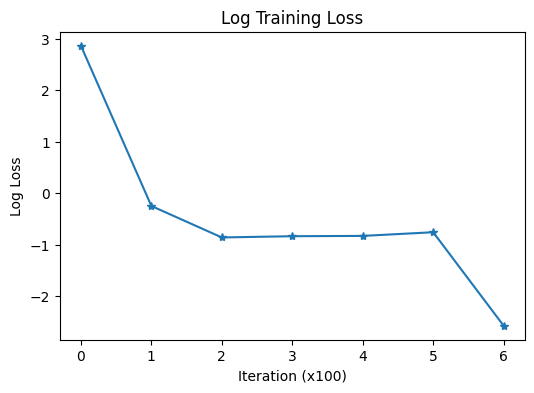

Training progress: 0/639
Training progress: 100/639
Training progress: 200/639
Training progress: 300/639
Training progress: 400/639
Training progress: 500/639
Training progress: 600/639
Training took 43.07 seconds.
Number of NaN losses encountered: 0


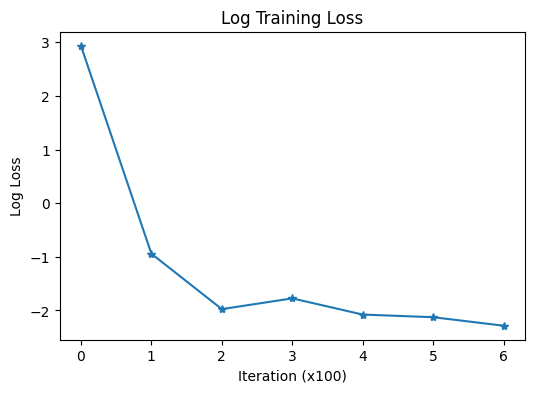

/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/FVI/utils.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  time_batch = torch.stack([torch.tensor(t, dtype=torch.float32) for t in batch.time])


Time step 2 Loss: 6.771156485825714e-05
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 40.80 seconds.
Number of NaN losses encountered: 0


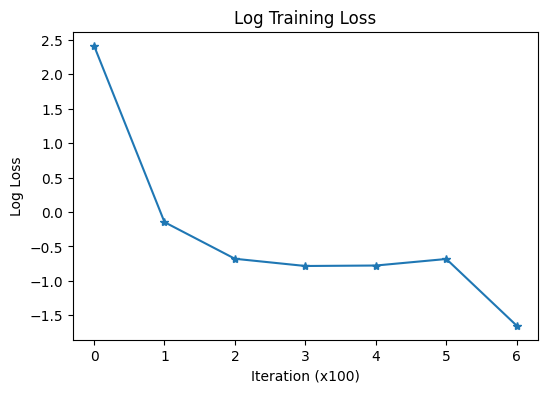

Training progress: 0/639
Training progress: 100/639
Training progress: 200/639
Training progress: 300/639
Training progress: 400/639
Training progress: 500/639
Training progress: 600/639
Training took 42.47 seconds.
Number of NaN losses encountered: 0


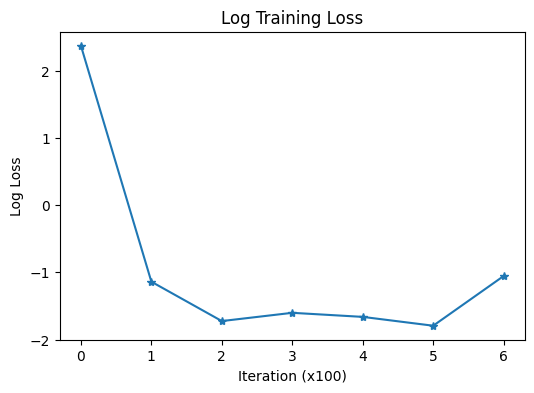

Time step 1 Loss: 10575147958272.0
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 42.22 seconds.
Number of NaN losses encountered: 0


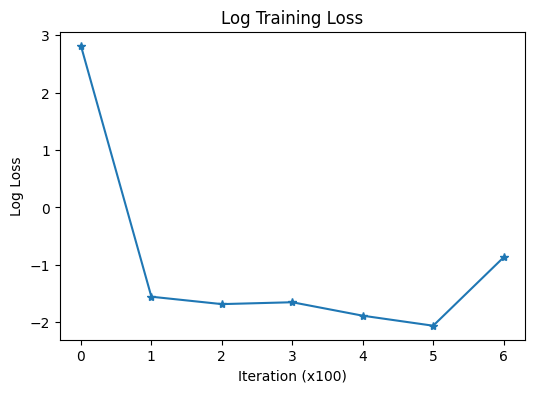

Training progress: 0/639
Training progress: 100/639
Training progress: 200/639
Training progress: 300/639
Training progress: 400/639
Training progress: 500/639
Training progress: 600/639
Training took 43.12 seconds.
Number of NaN losses encountered: 0


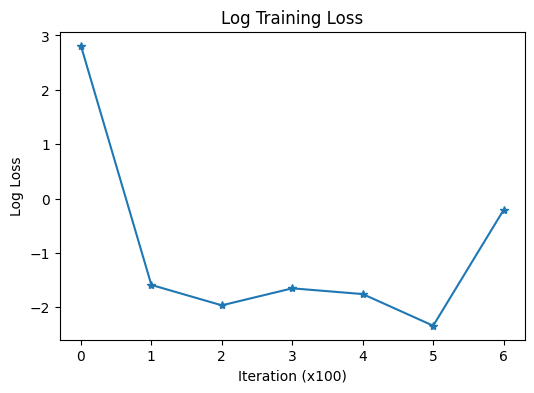

Time step 0 Loss: 1.483833194450774
Final value at time 0: 6.005620002746582


In [4]:
final_value, val_hist, loss_hist =train_dqn_instance(x_dim = 1, y_dim = 1, time_horizon = time_steps-1, samplepath_x = x_paths, samplepath_y = y_paths,
                                                    n_opt = 200, in_sample_size = 50,
                                                    device = device, discount=1, mem_size=3000, trunc_flag=True)

In [5]:
print(f"Computed Adapted Wasserstein Distance Squared: {final_value:.4f}")
print(f"Square Root of Adapted Wasserstein Distance: {np.sqrt(final_value):.4f}")

Computed Adapted Wasserstein Distance Squared: 6.0056
Square Root of Adapted Wasserstein Distance: 2.4506
